In [1]:
import numpy as np
import pandas as pd

In [2]:
#import data
data = pd.read_csv("D:\dataset_FLD.csv")

In [3]:
positive = data.loc[data['y']==1]

In [4]:
negative = data.loc[data['y']==0]

In [5]:
positive = positive.iloc[:,0:3].values
negative = negative.iloc[:,0:3].values

In [6]:
#calculate means in original space
M1 = np.mean(positive, axis = 0)
M2 = np.mean(negative, axis = 0)

In [7]:
print("M1 =",M1)
print("M2 =",M2)

M1 = [0.22310309 0.00255859 1.01027072]
M2 = [ 0.10229483  0.10337021 -1.00513   ]


In [8]:
#Calculating Sw
res1 = np.zeros([3,3])
for i in range(len(positive)):
    pos = positive[i]-M1
    pos.shape = (1,3)
    posT = np.transpose(pos)
    ans1 = np.dot(posT,pos)
    res1 = np.add(res1,ans1)    

In [9]:
res2 = np.zeros([3,3])
for i in range(len(negative)):
    neg = negative[i]-M2
    neg.shape = (1,3)
    negT = np.transpose(neg)
    ans2 = np.dot(negT,neg)
    res2 = np.add(res2,ans2)    

In [10]:
res1 = res1/len(positive)
res2 = res2/len(negative)

In [11]:
Sw = res1+res2
print("Sw is\n",Sw)

Sw is
 [[18.12275486 -0.19720153  0.1259276 ]
 [-0.19720153  1.97240312  0.02577773]
 [ 0.1259276   0.02577773  0.17936747]]


In [12]:
#Calculating Sw inverse
sw_inv = np.linalg.inv(Sw)
sw_inv

array([[ 0.05552224,  0.00607198, -0.03985285],
       [ 0.00607198,  0.50861384, -0.07735819],
       [-0.03985285, -0.07735819,  5.61424388]])

In [13]:
#Finding the vector w and normalising it
w = np.dot(sw_inv,np.transpose(M2-M1))
print("w is",w)

w is [  0.07422404   0.20644839 -11.31793517]


In [14]:
import math
mag = math.sqrt(w[0]*w[0]+w[1]*w[1]+w[2]*w[2])

In [15]:
w = w/mag
print("normalised w is",w)

normalised w is [ 0.00655686  0.01823739 -0.99981218]


In [16]:
#Finding projections of positive and negative points on unit vector w
positive_projections = np.zeros([len(positive)])
for i in range(len(positive)):
    positive_projections[i] = np.dot(w,np.transpose(positive[i]))

In [17]:
negative_projections = np.zeros([len(negative)])
for i in range(len(negative)):
    negative_projections[i] = np.dot(w,np.transpose(negative[i]))

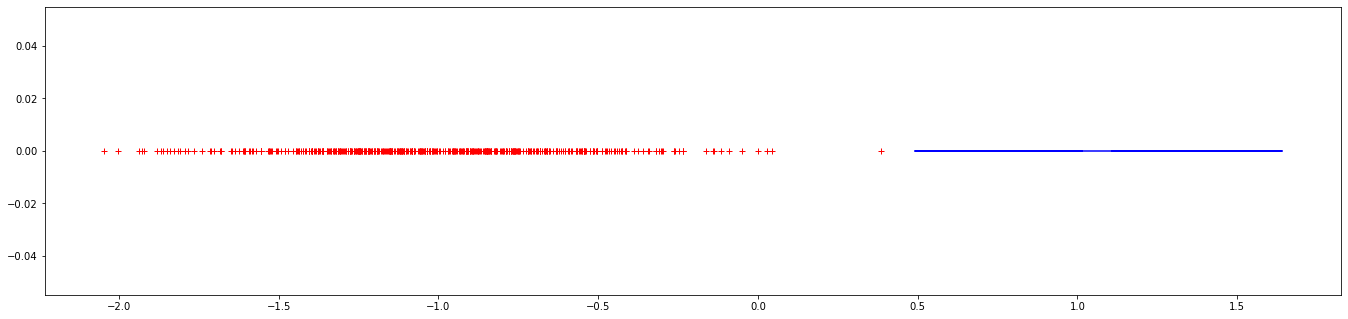

In [18]:
#Plotting reduced clusters of positive and negative data sets
import matplotlib.pyplot as plt
plt.axes((-2.5,-0.05,3,1))
plt.plot(positive_projections,np.zeros(len(positive_projections)),'r+')
plt.plot(negative_projections,np.zeros(len(negative_projections)),'b-')
plt.show()

In [19]:
#Fitting the reduced clusters into Gauss Normal Distributions
mu_p = np.mean(positive_projections)
std_p = np.std(positive_projections)
mu_n = np.mean(negative_projections)
std_n = np.std(negative_projections)

In [20]:
#Sorting projection data to plot the normal distributions
positive_projections.sort()
negative_projections.sort()

In [21]:
print("pos_nd_mean =",mu_p,"and pos_nd_std =",std_p)
print("neg_nd_mean =",mu_n,"and neg_nd_std =",std_n)

pos_nd_mean = -1.0085714575861837 and pos_nd_std = 0.3898154645217035
neg_nd_mean = 1.0074971533352852 and neg_nd_std = 0.16168139595107733


In [22]:
import matplotlib.pyplot as plt

In [23]:
#Solving the quadratic equations of ND1 and ND2 to find the intersection points
def findThreshold(mu1,mu2,std1,std2):
    p = 1/(2*std1**2) - 1/(2*std2**2)
    q = mu2/(std2**2) - mu1/(std1**2)
    r = mu1**2 /(2*std1**2) - mu2**2 / (2*std2**2) - np.log(std2/std1)
    return np.roots([p,q,r])

In [24]:
#Finding the threshold point which should be between the means of ND1 and ND2
intersection = findThreshold(mu_p,mu_n,std_p,std_n)
threshold = 0
for i in range(len(intersection)):
    if (mu_p < intersection[i]) and (mu_n > intersection[i]):
        threshold = intersection[i]
        break

print("Threshold is",threshold)

Threshold is 0.3893028020993765


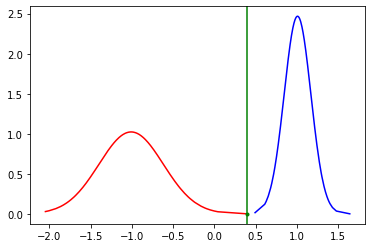

In [25]:
#Plotting the normal distributions and the discriminant line in 1D
from scipy.stats import norm
y1 = norm.pdf(positive_projections,mu_p,std_p)
plt.plot(positive_projections,y1,color='red')
y2 = norm.pdf(negative_projections,mu_n,std_n)
plt.plot(negative_projections,y2,color='blue')
plt.plot(threshold,0,marker = 'o',markersize=3,color='green')
plt.axvline(x=threshold, color='green')

In [26]:
#Calculating accuracy
correct_pclass = 0
for i in range(len(positive)):
    if np.dot(w,np.transpose(positive[i])) < threshold:
        correct_pclass += 1

correct_nclass = 0
for i in range(len(negative)):
    if np.dot(w,np.transpose(negative[i])) > threshold:
        correct_nclass += 1
accuracy = (correct_pclass + correct_nclass)/(len(positive) + len(negative))
print("Accuracy is",accuracy)


Accuracy is 1.0


In [27]:
#Plotting higher dimensional data and discriminant in oriignal space
Xp = positive[:,0]
Yp = positive[:,1]
Zp = positive[:,2]

In [28]:
Xn = negative[:,0]
Yn = negative[:,1]
Zn = negative[:,2]

In [29]:
import matplotlib.pyplot as mpp
mpp.rcParams['figure.figsize'] = (8,8)
mpp.rcParams['figure.dpi'] = 100


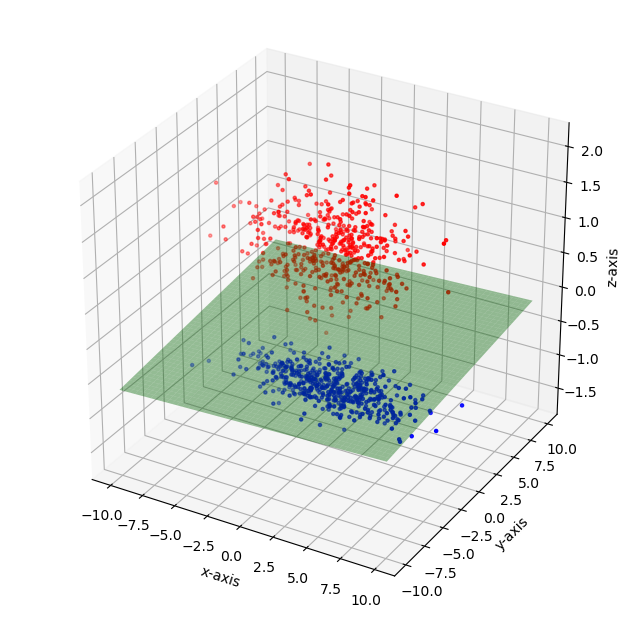

In [30]:

fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(Xp,Yp,Zp,c = 'r',marker='.')
ax.scatter(Xn,Yn,Zn,c = 'b',marker='.')
a = w[0]
b = w[1]
c = w[2]
xx = np.linspace(-10,10,100)
yy = np.linspace(-10,10,100)
xx, yy = np.meshgrid(xx, yy)
z = (intersection[1] - a*xx - b*yy)/c
ax.plot_surface(xx, yy, z, alpha=0.4,color = 'green')

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

In [31]:
#Printing Final results
print("Unit vector w :",w)
print("Threshold in 1D =",threshold)
print("Accuracy :",accuracy)

Unit vector w : [ 0.00655686  0.01823739 -0.99981218]
Threshold in 1D = 0.3893028020993765
Accuracy : 1.0
